read data         0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  



(404, 13) (102, 13) (404,) (102,)
[  0.46296   0.        6.2       0.        0.504     7.412    76.9
   3.6715    8.      307.       17.4     376.14      5.25   ]
(404, 13)
X_with_bias_terms [[1.00000e+00 4.62960e-01 0.00000e+00 6.20000e+00 0.00000e+00 5.04000e-01
  7.41200e+00 7.69000e+01 3.67150e+00 8.00000e+00 3.07000e+02 1.74000e+01
  3.76140e+02 5.25000e+00]
 [1.00000e+00 7.52601e+00 

/home/venktesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


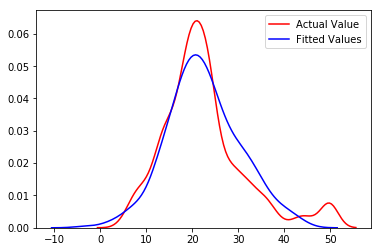

In [73]:

import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

def linear_regressor_closed_form(X,Y):
    return (np.linalg.pinv(np.matmul(X.T,X))@X.T@Y)

def add_polynomial_features(train_X, degree):
    polynomial_feature_dict = dict()
    # we need degree+1 as arange is half open 
    for degree_index in np.arange(1,degree+1):
        polynomial_feature_dict['X'+str(degree_index)] = train_X ** degree_index
    polynomial_feature_list = sorted(polynomial_feature_dict.items(), key=lambda x : x[0])
    polynomial_feature_dict = OrderedDict(polynomial_feature_list)
    train_X = np.column_stack(polynomial_feature_dict.values())
    return train_X

def predict(X,W):
    return X.dot(W)

def RMSE_error(observed_y, predicted_y):
    error_numerator = (predicted_y - observed_y)**2
    return np.sqrt(error_numerator.mean())

def k_fold_cross_validation(data, k, labels):
    divided_data = np.array_split(data, k)
    labels = np.array_split(labels, k)
    for i in range(k):
        data_for_fold = divided_data.copy()
        validation_data = divided_data[i]
        validation_labels = labels[i]
        train_labels = labels.copy()
        del data_for_fold[i]
        del train_labels[i]
        print((np.concatenate(train_labels).shape))
        train_data_for_fold = np.concatenate( data_for_fold, axis=0 )
        weights_estimated = linear_regressor_closed_form(train_data_for_fold, np.concatenate(train_labels))
        predictions_train = predict(train_data_for_fold, weights_estimated)
        train_error = RMSE_error(np.concatenate(train_labels), predictions_train)
        print("train_error", train_error)
        predictions_val = predict(validation_data, weights_estimated)
        val_error = RMSE_error(validation_labels, predictions_val)
        print("val_error", val_error)

    
def train_data_test_data_split(data, labels, split_factor):
    num_train_data = int(split_factor * data.shape[0])
    data_indices = range(data.shape[0])
    data_indices_shuffled = np.random.permutation(data_indices)
    train_data,test_data = data.iloc[data_indices_shuffled[:num_train_data]],data.iloc[data_indices_shuffled[num_train_data:]]
    train_labels, test_labels = labels.iloc[data_indices_shuffled[:num_train_data]], labels.iloc[data_indices_shuffled[num_train_data:]]
    return train_data, test_data, train_labels, test_labels
    

if __name__ == '__main__':

    boston_data = pd.read_csv('formatted_dataset.data' ,sep=',', header = None, engine='python')
    print("read data", boston_data.head())
    print("\n\n")
    # features and targets
    #MEDV - target
    target = boston_data.iloc[:,13]
    features = boston_data.iloc[:,:13]
    train_X, test_X, train_Y, test_Y = train_data_test_data_split(features, target, 0.8)
    print(train_X.shape,test_X.shape, train_Y.shape, test_Y.shape)
    train_X = train_X.values
    print(train_X[0])
    X_augmented = add_polynomial_features(train_X, 1)
    # X_with_bias_terms = np.insert(X_augmented, 0, 1, axis=1)
    # print("k_fold_cross_validation", k_fold_cross_validation(X_with_bias_terms, 5, train_Y))
    # X_augmented = add_polynomial_features(train_X, 2)
    # X_with_bias_terms = np.insert(X_augmented, 0, 1, axis=1)
    # print("k_fold_cross_validation", k_fold_cross_validation(X_with_bias_terms, 5, train_Y))
    # X_augmented = add_polynomial_features(train_X, 20)
        #insert ones as the first column to consider bias terms
    X_with_bias_terms = np.insert(X_augmented, 0, 1, axis=1)
    # print(X_with_bias_terms[:,0])
    train_Y = train_Y.values
    print(train_X.shape)
    print("X_with_bias_terms",X_with_bias_terms[:3])
    print("value of weights using closed form linear regressor is",X_with_bias_terms.shape, linear_regressor_closed_form(X_with_bias_terms, train_Y).shape)
    weights = linear_regressor_closed_form(X_with_bias_terms, train_Y)
    predictions_train = predict(X_with_bias_terms, weights)
    print('predictions_train',predictions_train.shape)
    train_error = RMSE_error((train_Y), predictions_train)
    print("train_error", train_error)
    print("k_fold_cross_validation", k_fold_cross_validation(X_with_bias_terms, 5, train_Y))
    import seaborn as sns

    ax1 = sns.distplot(train_Y, hist=False, color="r", label="Actual Value")
    sns.distplot(predictions_train, hist=False, color="b", label="Fitted Values" , ax=ax1)

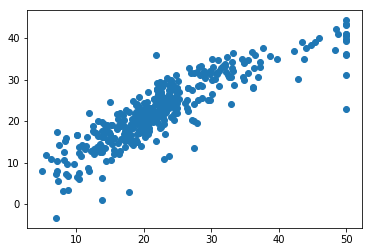

In [74]:
plt.scatter(train_Y, predictions_train)

In [75]:
weights.shape

(14,)

In [78]:
#     def plot_predictedPolyLine():
#         """Plot predicted polynomial line using values of theta found
#         using normal equation or gradient descent method
        
#         Returns
#         -----------       
#         matploblib figure
#         """        
#         plt.figure()
#         plt.scatter(train_X[:,1], train_Y, s = 30, c = 'b') 
#         line = weights[0] #y-intercept 
#         label_holder = []
#         label_holder.append('%.*f' % (2, weights[0]))
#         for i in np.arange(1, len(weights)):            
#             line += weights[i] * np.insert(train_X, 0, 1, axis=1) ** i 
#             label_holder.append(' + ' +'%.*f' % (2, weights[i]) + r'$x^' + str(i) + '$') 

#         plt.plot(train_X, line, label = ''.join(label_holder))        
#         plt.title('Polynomial Fit: Order ' + str(len(weights)-1))
#         plt.xlabel('x')
#         plt.ylabel('y') 
#         plt.legend(loc = 'best')

/home/venktesh/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


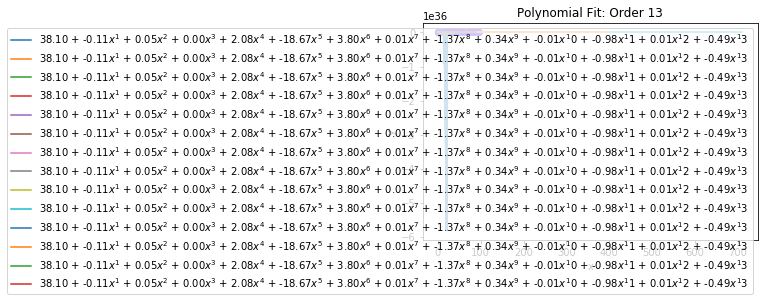

In [80]:
plot_predictedPolyLine()